# Feature importance

Here we look at feature importance using a random forest
model trained using a random split using 70 features.

In [22]:
import ensemble_test as et
import numpy as np
import pandas as pd
import simple_featurizer as sf

# this model was trained using the training data after hyperparameter optimization
forest_pipeline = et.load_model('../models/classification_sklearn_models_70_cv/rf_best_params_test_model.pkl')
forest = forest_pipeline['Classifier']
df = pd.read_csv('../data/query_files9/random_train_df_70_nodup.csv', dtype={'id':str})

feature_cols = sf.get_feature_columns(df.columns)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

# sort them based on importance
sorted_index = sorted(range(len(feature_cols)), key=lambda x: importances[x], reverse=True)
feature_cols = [feature_cols[si] for si in sorted_index]
importances = importances[sorted_index]
std = std[sorted_index]

Text(0, 0.5, 'Mean decrease in impurity')

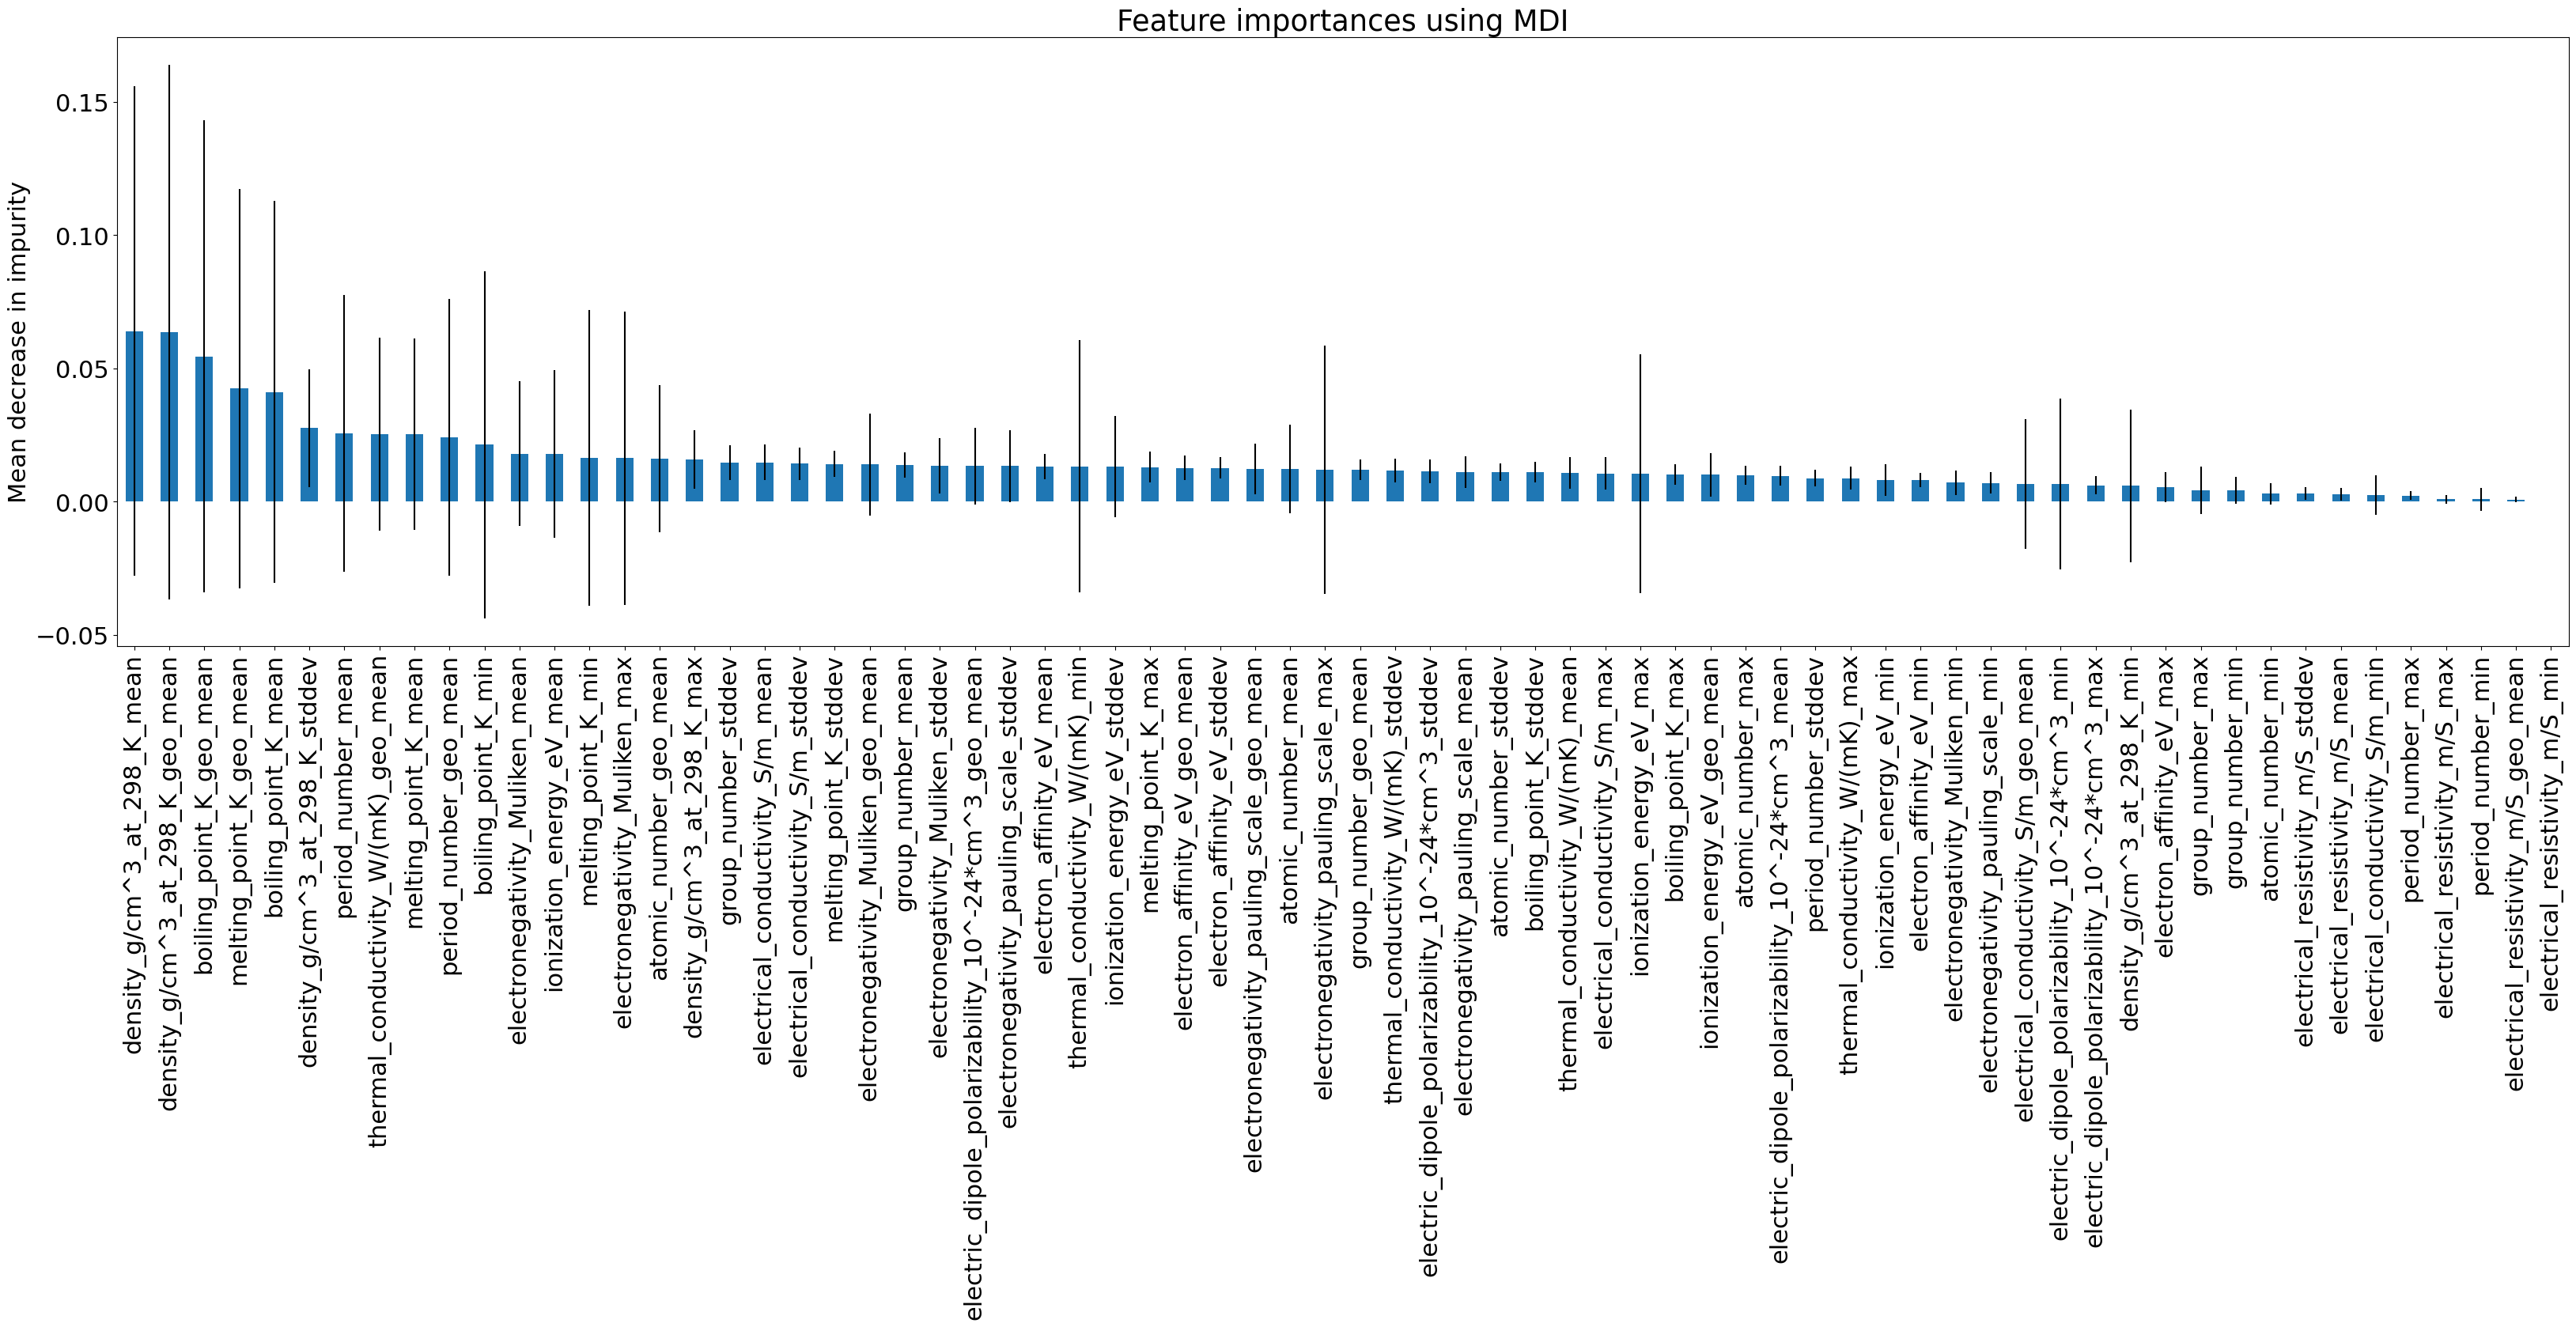

In [30]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(40,10))
forest_importances = pd.Series(importances, index=[f[2:] for f in feature_cols])
ax = forest_importances.plot.bar(yerr=std)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
